## What's Cooking? 
Use recipe ingredients to categorize the cuisine

### Import libraries

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import zipfile
sb.set()

### Extract dataset
Extract train.json from zipfile and peek using `head` function

In [61]:
train_file = zipfile.ZipFile('train.json.zip', 'r')
train_data = pd.read_json(train_file.read('train.json'))
train_data.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [62]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


`id` is read as integers. <br>
`cuisine` and `ingredients` are read as objects.<br>
The columns with object dtype are the possible categorical features in your dataset.

Filter Categorical data

In [63]:
cat_train_data = train_data.select_dtypes(include=['object']).copy()
cat_train_data.head()

,cuisine,ingredients
0,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,"[water, vegetable oil, wheat, salt]"
4,indian,"[black pepper, shallots, cornflour, cayenne pe..."


check for null values in the dataset

In [64]:
print(cat_train_data.isnull().values.sum())

0


Another Exploratory Data Analysis (EDA) step that you might want to do on categorical features is the frequency distribution of categories within the feature, which can be done with the `.value_counts()`

In [65]:
print(cat_train_data['cuisine'].value_counts())

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64


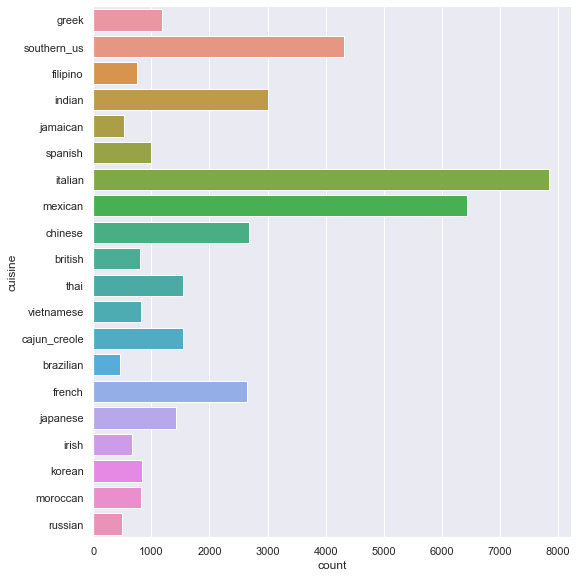

In [66]:
sb.catplot(y='cuisine', data = cat_train_data, kind = 'count', height = 8)

In [67]:
train_dict_count = {} #initialize an empty dictionary
for b in train_data['ingredients']:
    for a in b:
        if a in train_dict_count.keys():
            # Increment the count by 1
            train_dict_count[a] += 1
        else:
            train_dict_count[a] = 1

In [68]:
len(train_dict_count)

6714

In [69]:
for cols in train_dict_count.keys():
    train_data[cols] = np.zeros((train_data.shape[0], 1))

In [70]:
train_data.shape

(39774, 6717)

In [71]:
train_data

,id,cuisine,ingredients,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,...,Oscar Mayer Cotto Salami,Challenge Butter,orange glaze,cholesterol free egg substitute,ciabatta loaf,Lipton® Iced Tea Brew Family Size Tea Bags,Hidden Valley® Greek Yogurt Original Ranch® Dip Mix,lop chong,tomato garlic pasta sauce,crushed cheese crackers
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22213,indian,"[water, vegetable oil, wheat, salt]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
pd.options.mode.chained_assignment = None  # default='warn'

for i in range(len(train_data)):
    for j in train_data['ingredients'][i]:
        train_data[j].iloc[i]=1

In [73]:
train_data

,id,cuisine,ingredients,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,...,Oscar Mayer Cotto Salami,Challenge Butter,orange glaze,cholesterol free egg substitute,ciabatta loaf,Lipton® Iced Tea Brew Family Size Tea Bags,Hidden Valley® Greek Yogurt Original Ranch® Dip Mix,lop chong,tomato garlic pasta sauce,crushed cheese crackers
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22213,indian,"[water, vegetable oil, wheat, salt]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
# Import libraries
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import category_encoders as ce

In [75]:
encoder = ce.OneHotEncoder(handle_unknown='return_nan', return_df=True, use_cat_names=True)
cooking_data = encoder.fit_transform(train_data['cuisine'])
# ingredients_data = encoder.fit_transform(train_data['ingredients'])
cooking_data
# ingredients_data

,cuisine_greek,cuisine_southern_us,cuisine_filipino,cuisine_indian,cuisine_jamaican,cuisine_spanish,cuisine_italian,cuisine_mexican,cuisine_chinese,cuisine_british,cuisine_thai,cuisine_vietnamese,cuisine_cajun_creole,cuisine_brazilian,cuisine_french,cuisine_japanese,cuisine_irish,cuisine_korean,cuisine_moroccan,cuisine_russian
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
39770,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
39772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
ingredients_data = train_data.drop(['id', 'cuisine','ingredients'],axis=1)
ingredients_data

,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,feta cheese crumbles,plain flour,...,Oscar Mayer Cotto Salami,Challenge Butter,orange glaze,cholesterol free egg substitute,ciabatta loaf,Lipton® Iced Tea Brew Family Size Tea Bags,Hidden Valley® Greek Yogurt Original Ranch® Dip Mix,lop chong,tomato garlic pasta sauce,crushed cheese crackers
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39770,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
cuisine_data = train_data['cuisine']
cuisine_data

0              greek
1        southern_us
2           filipino
3             indian
4             indian
            ...     
39769          irish
39770        italian
39771          irish
39772        chinese
39773        mexican
Name: cuisine, Length: 39774, dtype: object

In [89]:
# split the data: train and test

# Random Train-Test-Split
seed = 7
testSize = 0.25
cuisine_train, cuisine_test= train_test_split(cuisine_data, test_size = testSize, random_state = seed)
ingredients_train, ingredients_test= train_test_split(ingredients_data, test_size = testSize, random_state = seed)

# Check the sample sizes
print("Train set : ", cuisine_train.shape)
print("Test set : ", cuisine_test.shape)

Train set :  (29830,)
Test set :  (9944,)


In [90]:
# fit model no training data
model = XGBClassifier()
model.fit(ingredients_train, cuisine_train)

C:\Users\lrazerblade\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:20:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [91]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)


In [92]:
# make predictions for test data
y_pred = model.predict(ingredients_test)
predictions = [value for value in y_pred]

In [93]:
# evaluate predictions
accuracy = accuracy_score(cuisine_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.41%
